In [1]:
!pip install -q opencv-python scikit-image torch torchvision ftfy regex tqdm
!pip install -q git+https://github.com/openai/CLIP.git

🔍 Pixel Similarity:
 - MSE: 105.71
 - SSIM: 0.2541

🧠 Semantic Similarity (CLIP Cosine): 0.9179
🎯 Scaled CLIP Score (0–100): 79.47


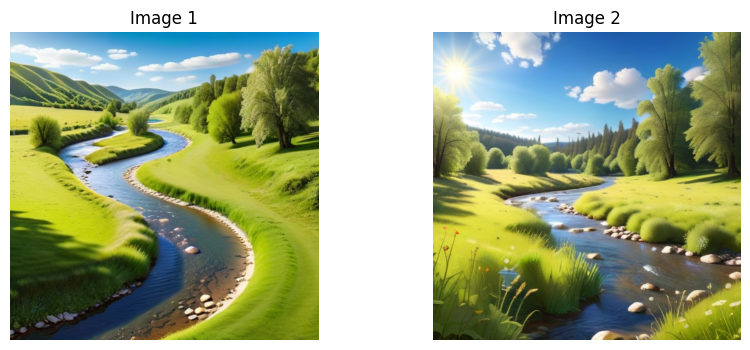

In [36]:
# 📚 Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import torch
import clip
import os

# 🖼️ Embedded local image paths (edit these to match your local files)
image_path_1 = "/Users/fatihwolf/Downloads/output (2)/row_19_teacher.png"
image_path_2 = "/Users/fatihwolf/Downloads/output (2)/row_19_student.png"

# 📷 Load images
img1 = cv2.imread(image_path_1)
img2 = cv2.imread(image_path_2)

if img1 is None or img2 is None:
    raise FileNotFoundError("One or both image paths are incorrect or the files do not exist.")

# Convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 🧮 Resize both to same dimensions
height = min(img1_gray.shape[0], img2_gray.shape[0])
width = min(img1_gray.shape[1], img2_gray.shape[1])
img1_resized = cv2.resize(img1_gray, (width, height))
img2_resized = cv2.resize(img2_gray, (width, height))

# ✅ MSE & SSIM
mse_val = np.mean((img1_resized - img2_resized) ** 2)
ssim_val = ssim(img1_resized, img2_resized)

print(f"🔍 Pixel Similarity:")
print(f" - MSE: {mse_val:.2f}")
print(f" - SSIM: {ssim_val:.4f}")

# 🧠 Semantic similarity using CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/16", device=device)

def get_clip_embedding(image_path):
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        return model.encode_image(image).cpu().numpy()[0]

embedding1 = get_clip_embedding(image_path_1)
embedding2 = get_clip_embedding(image_path_2)

cosine_similarity = (np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))) 

# 🧠 Rescale to 0–100
scaled_clip_score = ((cosine_similarity - 0.6) / 0.4) * 100

print(f"\n🧠 Semantic Similarity (CLIP Cosine): {cosine_similarity:.4f}")
print(f"🎯 Scaled CLIP Score (0–100): {scaled_clip_score:.2f}")
# 📊 Show images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.axis("off")

plt.show()
